In [88]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np

Months = [9,6,5,3,4,7,11,5,6,9,4,6, 1] #Month index. I.e: Jan = 0, Feb = 1, etc... This is for David's data. Used Feb data for last one.
df = pd.read_excel("InflationData.xlsx", 
                   index_col = 0)   

Canes_data = [8.79, 9.9,10.99,11.55,11.62,11.74,12.27,13.49,14.99,15.19,15.38,16.35, 17.27] #David's data. 
print(df["Unnamed: 1"]) #Example. Data was shitty but what can u do. I fix this below.

NaN     NaN
NaN     NaN
NaN     NaN
NaN     NaN
NaN     NaN
NaN     NaN
NaN     NaN
NaN     NaN
NaN     NaN
NaN     NaN
Year    Jan
2012    2.3
2013    1.9
2014    1.6
2015    1.6
2016    2.2
2017    2.3
2018    1.8
2019    2.2
2020    2.3
2021    1.4
2022      6
2023    5.6
2024    3.9
Name: Unnamed: 1, dtype: object


In [95]:
months_data = [df["Unnamed: {}".format(i)][10:] for i in range(1,15)]
print(months_data[0]) #Jan data.
print("")
print(months_data[0].values) #January data for each year, starting from 2012, ending in 2023. Index 0 is for january, etc...

Year    Jan
2012    2.3
2013    1.9
2014    1.6
2015    1.6
2016    2.2
2017    2.3
2018    1.8
2019    2.2
2020    2.3
2021    1.4
2022      6
2023    5.6
2024    3.9
Name: Unnamed: 1, dtype: object

['Jan' 2.3 1.9 1.6 1.6 2.2 2.3 1.8 2.2 2.3 1.4 6 5.6 3.9]


In [96]:
Use_Inflation = [months_data[Months[i]].values[i+1] for i in range(1, len(Months))] #Inflation for alloted dates.
Use_Inflation

[1.7, 1.9, 1.8, 2.2, 1.7, 2.2, 2.1, 1.6, 4.6, 6, 4.7, 3.8]

In [97]:
Date_list = ["{0}/{1}".format(Months[i]+1, 2012 + i) for i in range(1, len(Months))]
Date_list

['7/2013',
 '6/2014',
 '4/2015',
 '5/2016',
 '8/2017',
 '12/2018',
 '6/2019',
 '7/2020',
 '10/2021',
 '5/2022',
 '7/2023',
 '2/2024']

In [104]:
Canes_Percent_Change = [(Canes_data[i+1]/Canes_data[i])*100 - 100 for i in range(len(Months) - 1)]
Canes_Percent_Change

[12.627986348122874,
 11.01010101010101,
 5.095541401273891,
 0.6060606060605949,
 1.0327022375215194,
 4.514480408858603,
 9.942950285248585,
 11.119347664936981,
 1.3342228152101399,
 1.250822909809088,
 6.306892067620296,
 5.626911314984696]

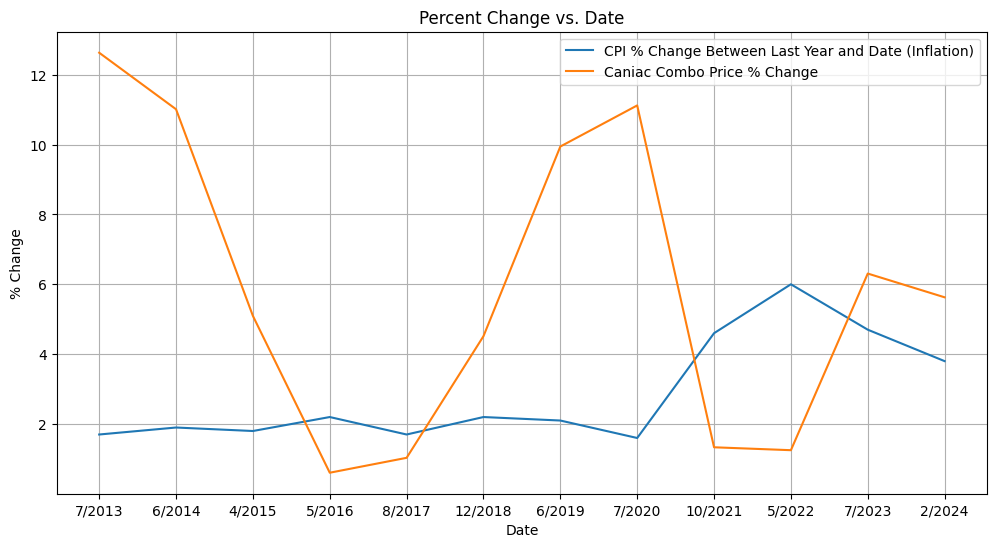

In [129]:
#Simple plot for percentage inflation at the given date/year. 
SD_Inflation = np.round(np.std(Use_Inflation),4)
SD_Canes = np.round(np.std(Canes_Percent_Change),4)

plt.figure(figsize=(12,6))
plt.plot(Date_list, Use_Inflation)
plt.plot(Date_list, Canes_Percent_Change)
plt.title("Percent Change vs. Date")
plt.ylabel("% Change")
plt.xlabel("Date")
plt.grid()
plt.legend(["CPI % Change Between Last Year and Date (Inflation)", "Caniac Combo Price % Change"])
plt.show()

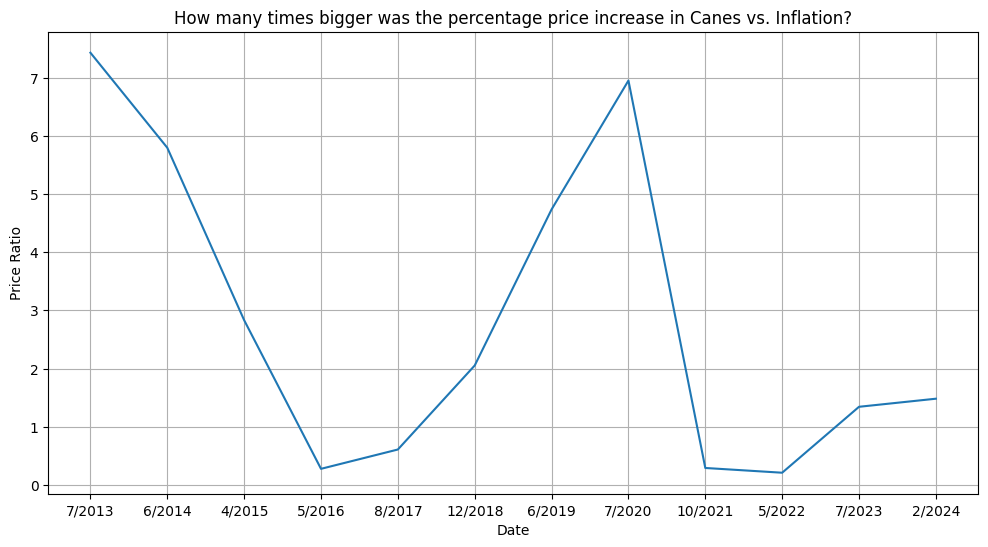

In [130]:
#Ratio of changes in price (Canes/Inflation):
Price_Ratio = np.array(Canes_Percent_Change)/np.array(Use_Inflation)

#Plot of the above vs. date:
plt.figure(figsize=(12,6))
plt.plot(Date_list, Price_Ratio)
plt.ylabel("Price Ratio")
plt.xlabel("Date")
plt.grid()
plt.title("How many times bigger was the percentage price increase in Canes vs. Inflation?")
plt.show()